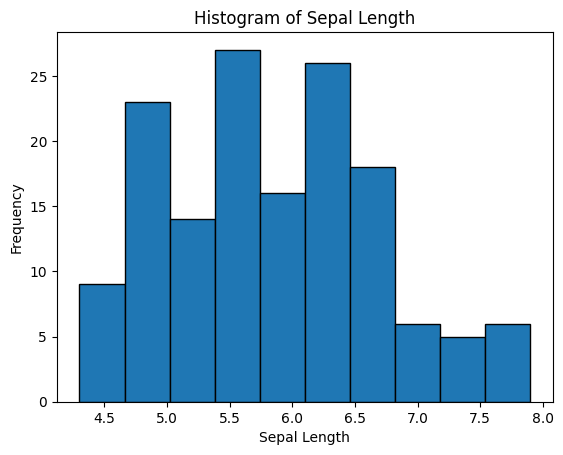

In [15]:
#หาใน matplotlip
import matplotlib.pyplot as plt
from sklearn import datasets

# โหลดชุดข้อมูล
iris = datasets.load_iris()
X = iris.data
y = iris.target

# กราฟแสดงความถี่ของ Sepal_length
plt.hist(X[:, 0], bins=10, edgecolor='black')
plt.title('Histogram of Sepal Length')
plt.xlabel('Sepal Length')
plt.ylabel('Frequency')
plt.show()

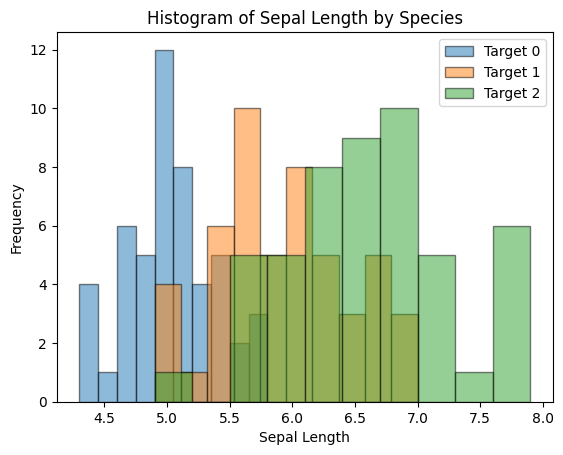

In [2]:
for i in range(3):
    plt.hist(X[y == i, 0], bins=10, alpha=0.5, label=f'Target {i}', edgecolor='black')

plt.title('Histogram of Sepal Length by Species')
plt.xlabel('Sepal Length')
plt.ylabel('Frequency')
plt.legend()
plt.show()

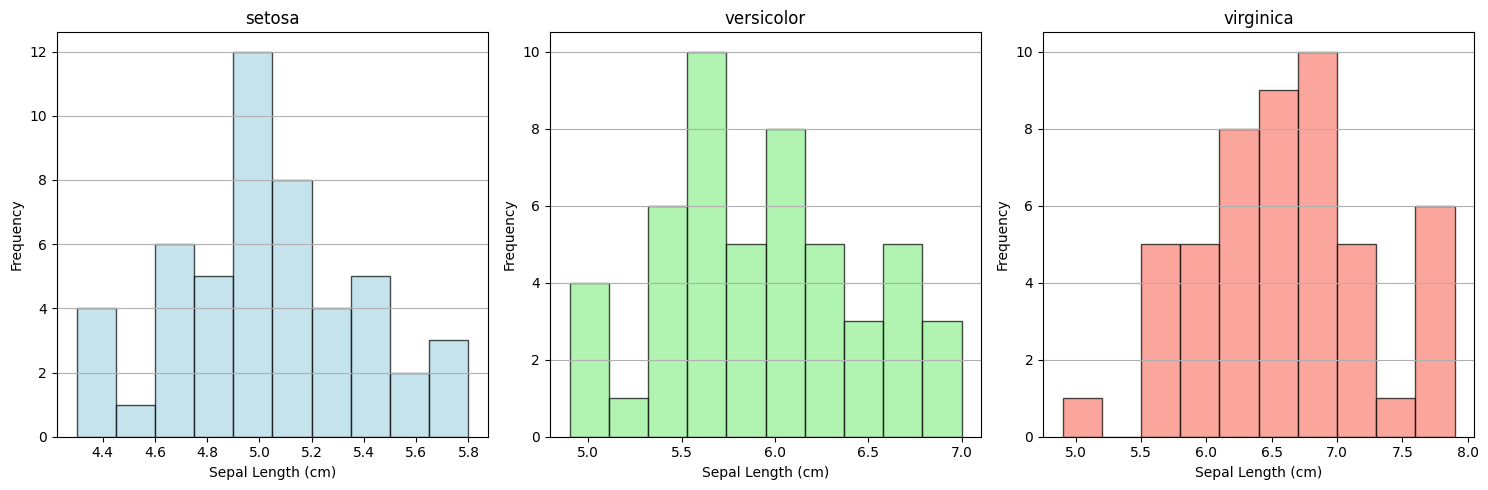

In [7]:
# กำหนดชื่อของแต่ละคลาส
species_names = iris.target_names

# กำหนดสีสำหรับแต่ละประเภท
colors = ['lightblue', 'lightgreen', 'salmon']

# สร้างกราฟ Histogram แยกตามประเภท
plt.figure(figsize=(15, 5))

# แสดงกราฟสำหรับแต่ละประเภท
for i in range(3):
    plt.subplot(1, 3, i + 1)  # แบ่งกราฟเป็น 1 แถว 3 คอลัมน์
    plt.hist(X[y == i, 0], bins=10, alpha=0.7, color=colors[i], edgecolor='black')
    plt.title(species_names[i])
    plt.xlabel('Sepal Length (cm)')
    plt.ylabel('Frequency')
    plt.grid(axis='y')

plt.tight_layout()  # ปรับให้กราฟไม่ทับซ้อนกัน
plt.show()

In [8]:
# ตรวจสอบหมายเลข Label ของข้อมูลแต่ละตัว
target = y
print("Labels for each sample:", target)


Labels for each sample: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [9]:
from sklearn.cluster import DBSCAN

# สร้างโมเดล DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)

# ทำการฟิตข้อมูล
clusters = dbscan.fit_predict(X)

# แสดงผลลัพธ์การทำคลัสเตอริ่ง
print("Cluster labels:", clusters)


Cluster labels: [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0
  0  0  1  1  1  1  1  1  1 -1  1  1 -1  1  1  1  1  1  1  1 -1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1 -1  1  1
  1  1 -1  1  1  1  1  1  1 -1 -1  1 -1 -1  1  1  1  1  1  1  1 -1 -1  1
  1  1 -1  1  1  1  1  1  1  1  1 -1  1  1 -1 -1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1]


In [31]:
import pandas as pd
from sklearn import datasets
from sklearn.cluster import DBSCAN

# โหลดชุดข้อมูล
iris = datasets.load_iris()
X = iris.data

# กำหนดค่าของ EPS ที่ต้องการทดลอง
eps_values = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
results = []

# ตัวแปรสำหรับเก็บค่า EPS ที่ดีที่สุด
best_eps = None
best_labels = None

# ทดลอง DBSCAN กับค่า EPS ที่กำหนด
for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=5)
    clusters = dbscan.fit_predict(X)
    num_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)  # จำนวนคลัสเตอร์ที่ไม่ใช่ noise
    results.append((eps, num_clusters))

    # ตรวจสอบว่าคลัสเตอร์มากที่สุดหรือไม่
    if best_labels is None or num_clusters > len(set(best_labels)) - (1 if -1 in best_labels else 0):
        best_eps = eps
        best_labels = clusters

# แสดงผลลัพธ์
for eps, num_clusters in results:
    print(f'eps: {eps}, = {num_clusters}')

print(best_eps)



eps: 0.2, = 2
eps: 0.3, = 3
eps: 0.4, = 4
eps: 0.5, = 2
eps: 0.6, = 2
eps: 0.7, = 2
eps: 0.8, = 2
eps: 0.9, = 2
eps: 1.0, = 2
0.4


In [72]:
X = iris.data
y = iris.target
db = DBSCAN(eps=0.2, min_samples=4).fit(X)
print(db.labels_)
print(y)

[ 0  1 -1 -1  0 -1 -1  0 -1  1 -1 -1  1 -1 -1 -1 -1  0 -1 -1 -1 -1 -1 -1
 -1  1 -1  0  0  1  1 -1 -1 -1  1 -1 -1  0 -1  0  0 -1 -1 -1 -1  1 -1 -1
 -1  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  2 -1 -1 -1 -1 -1 -1  2
  2 -1 -1  2 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [69]:
db = DBSCAN(eps=0.3, min_samples=4).fit(X)
print(db.labels_)

[ 0  0  0  0  0 -1  0  0  0  0  0  0  0  0 -1 -1 -1  0 -1  0 -1  0 -1  0
  0  0  0  0  0  0  0 -1 -1 -1  0  0  0  0  0  0  0 -1  0  0 -1  0  0  0
  0  0 -1 -1 -1 -1 -1 -1 -1 -1  3 -1 -1 -1 -1  1 -1  3 -1  2 -1  2  5 -1
 -1  1  3  3 -1 -1  1 -1  2  2  2 -1 -1 -1 -1 -1  2  2  2  1  2 -1  2  2
  2 -1 -1  2 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
  4 -1 -1  5  4 -1  5  5 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  5 -1  4 -1 -1  4
 -1 -1 -1 -1 -1  5]


In [71]:
db = DBSCAN(eps=0.4, min_samples=4).fit(X)
print(db.labels_)

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0 -1  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0
  0  0  1  1  1  1  1  1  1  3  1  1  3  1 -1  1 -1  1  1  1 -1  1  2  1
  2  1  1  1  1  1  1  1  1  1  1  2  1 -1  1 -1  1  1  1  1  1  3  1  1
  1  1  3  1 -1  2  2  2  2 -1 -1 -1 -1 -1  2  2  2  2 -1  2  2 -1 -1 -1
  2  2 -1  2  2 -1  2  2  2 -1 -1 -1  2  2 -1 -1  2  2  2  2  2  2  2  2
  2  2  2  2  2  2]
